In [2]:
from nba_api.stats.static import teams

list_of_dict = teams.get_teams()
list_of_dict[0:2]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946}]

In [5]:
def one_dict(list_of_dict):
    keys = list_of_dict[0].keys()
    out_dict = {key:[] for key in keys}
    for dict in list_of_dict:
        for key, value in dict.items():
            out_dict[key].append(value)
    return out_dict

In [9]:
import pandas as pd

df = pd.DataFrame(one_dict(list_of_dict))
df.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [11]:
df_warriors = df[df['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [15]:
df_warriors_id = df_warriors['id'].values[0]
df_warriors_id

1610612744

In [19]:
from nba_api.stats.endpoints import LeagueGameFinder

game_finder = LeagueGameFinder(team_id_nullable=df_warriors_id)
games = game_finder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,52023,1610612744,GSW,Golden State Warriors,0052300131,2024-04-16,GSW @ SAC,L,239,94,...,0.783,8.0,34.0,42.0,19,5,3,16,17,-24.0
1,22023,1610612744,GSW,Golden State Warriors,0022301198,2024-04-14,GSW vs. UTA,W,239,123,...,0.826,12.0,30.0,42.0,35,10,6,9,14,7.0
2,22023,1610612744,GSW,Golden State Warriors,0022301182,2024-04-12,GSW vs. NOP,L,240,109,...,0.762,11.0,42.0,53.0,27,6,5,16,15,-5.0
3,22023,1610612744,GSW,Golden State Warriors,0022301169,2024-04-11,GSW @ POR,W,240,100,...,0.800,10.0,36.0,46.0,24,8,13,16,18,8.0
4,22023,1610612744,GSW,Golden State Warriors,0022301155,2024-04-09,GSW @ LAL,W,241,134,...,0.667,4.0,38.0,42.0,37,3,12,15,17,14.0


In [23]:
games_home = games[games['MATCHUP']=='GSW vs. TOR']
games_away = games[games['MATCHUP']=='GSW @ TOR'] 

In [24]:
games_home['PLUS_MINUS'].mean()

3.375

In [25]:
games_away['PLUS_MINUS'].mean()

-1.7212121212121212

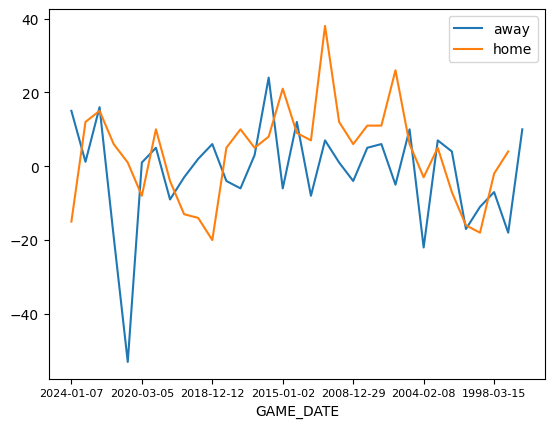

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE', y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE', y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
ax.tick_params(axis='x', labelsize=8)
plt.show() 